In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble,model_selection,feature_extraction,preprocessing,linear_model,svm,cluster
import lightgbm
import xgboost
import scipy
from bayes_opt import BayesianOptimization
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import catboost

In [2]:
test1=pd.read_csv("./DS_1_electron_test.csv")
train1=pd.read_csv("./DS_1_electron_train.csv")

In [3]:
train=pd.read_csv("./DS_1_train.csv")
test=pd.read_csv("./DS_1_test.csv")

In [4]:
X=train.drop(["index","event_id","signal"],axis=1)

In [5]:
y=train.signal

In [6]:
X["cat_Z"]=pd.factorize(X.Z)[0]

In [6]:
X.X.mean()

50190.242319623772

In [7]:
X["X_sred"]=np.abs(X.X-X.X.mean())
X["Y_sred"]=np.abs(X.Y-X.Y.mean())
X["X_log"]=np.log(np.abs(X.X-X.X.mean())+1)
X["Y_log"]=np.log(np.abs(X.Y-X.Y.mean())+1)
X["diag"]=np.sqrt(X.X_sred*X.X_sred+X.Y_sred*X.Y_sred)
X["cos"]=X.X_sred/X.diag
X["sin"]=X.Y_sred/X.diag
X["tan"]=X.X_sred/X.Y_sred
X["TXY"]=X.TX*X.TY

test["X_sred"]=np.abs(test.X-test.X.mean())
test["Y_sred"]=np.abs(test.Y-test.Y.mean())
test["X_log"]=np.log(np.abs(test.X-test.X.mean())+1)
test["Y_log"]=np.log(np.abs(test.Y-test.Y.mean())+1)
test["diag"]=np.sqrt(test.X_sred*test.X_sred+test.Y_sred*test.Y_sred)
test["cos"]=test.X_sred/test.diag
test["sin"]=test.Y_sred/test.diag
test["tan"]=test.X_sred/test.Y_sred
test["TXY"]=test.TX*test.TY

In [8]:
test.head()

,index,X,Y,Z,TX,TY,chi2,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,0,37259.390625,62516.367188,63357.0,-0.475465,-0.250186,1.405402,12865.520828,22337.911657,9.462384,10.014085,25777.973608,0.499090,0.866550,0.575950,0.118955
1,1,41426.312500,57520.265625,25860.0,-0.213876,0.155208,2.541856,8698.598953,17341.810094,9.071032,9.760933,19401.134015,0.448355,0.893855,0.501597,-0.033195
2,2,40752.921875,54653.265625,46548.0,0.044215,-0.333426,2.389629,9371.989578,14474.810094,9.145587,9.580234,17243.964623,0.543494,0.839413,0.647469,-0.014742
3,3,29293.980469,23582.425781,14223.0,-0.265671,-0.137444,2.402328,20830.930984,16596.029750,9.944242,9.716979,26633.735921,0.782126,0.623121,1.255176,0.036515
4,4,49538.128906,63314.617188,31032.0,-0.063467,-0.550298,1.223460,586.782547,23136.161657,6.376357,10.049195,23143.601491,0.025354,0.999679,0.025362,0.034926


In [10]:
X.head()

,X,Y,Z,TX,TY,chi2,cat_Z,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,42720.238281,75152.406250,32325.0,-0.475539,0.405506,2.652586,0,7470.004038,34964.031668,8.918785,10.462104,35753.104352,0.208933,0.977930,0.213648,-0.192834
1,46023.816406,37043.359375,21981.0,0.330822,-0.013988,2.497527,1,4166.425913,3145.015207,8.335054,8.053892,5220.174858,0.798139,0.602473,1.324771,-0.004628
2,52706.117188,33872.730469,16809.0,0.342634,-0.058724,2.120421,2,2515.874868,6315.644114,7.830773,8.750943,6798.307651,0.370074,0.929002,0.398356,-0.020121
3,47334.101562,9698.531250,60771.0,0.007868,-0.632822,0.618535,3,2856.140757,30489.843332,7.957577,10.325182,30623.325856,0.093267,0.995641,0.093675,-0.004979
4,67380.835938,19137.265625,37497.0,-0.212537,-0.192243,2.799303,4,17190.593618,21051.108957,9.752176,9.954756,27178.404980,0.632509,0.774553,0.816612,0.040859


In [24]:
X.loc[X.Z==0,:]

,X,Y,Z,TX,TY,chi2,cat_Z,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan
64,35627.394531,28980.882812,0.0,-0.562537,0.296801,1.061623,38,14562.847788,11207.491770,9.586298,9.324427,18376.191321,0.792485,0.609892,1.299385
196,68499.609375,69862.812500,0.0,0.084524,0.219122,1.788610,38,18309.367055,29674.437918,9.815223,10.298075,34868.398123,0.525099,0.851041,0.617008
233,35666.613281,48572.957031,0.0,0.147879,-0.409914,2.147873,38,14523.629038,8384.582449,9.583601,9.034269,16770.122936,0.866042,0.499971,1.732183
260,34214.519531,72173.015625,0.0,-0.114472,-0.392560,2.878452,38,15975.722788,31984.641043,9.678888,10.373042,35752.496154,0.446842,0.894613,0.499481
294,45205.449219,16765.238281,0.0,0.195443,0.310277,1.547560,38,4984.793101,23423.136301,8.514348,10.061522,23947.682068,0.208153,0.978096,0.212815
385,54460.820312,52593.269531,0.0,-0.058110,0.216778,2.825368,38,4270.577993,12404.894949,8.359739,9.425927,13119.422818,0.325516,0.945537,0.344266
453,28637.695312,35740.691406,0.0,0.112133,0.483203,1.190231,38,21552.547007,4447.683176,9.978296,8.400363,22006.684624,0.979364,0.202106,4.845792
494,59103.218750,16809.660156,0.0,-0.340365,0.152725,1.107967,38,8912.976430,23378.714426,9.095376,10.059624,25020.100661,0.356233,0.934397,0.381243
513,34906.167969,48104.531250,0.0,0.239667,-0.059840,0.836410,38,15284.074351,7916.156668,9.634632,8.976787,17212.450876,0.887966,0.459909,1.930744
515,68499.296875,71814.171875,0.0,-0.188207,0.247693,2.304847,38,18309.054555,31625.797293,9.815206,10.361760,36543.296692,0.501024,0.865434,0.578928


In [57]:
a=preprocessing.OneHotEncoder(categorical_features=[6])
l=a.fit_transform(X)

In [54]:
l.shape

(1, 1123177)

In [50]:
X.cat_Z

0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13          1
14         13
15         14
16         15
17         15
18         16
19         10
20         17
21         18
22         10
23          6
24          1
25         19
26         20
27         21
28         22
29         23
           ..
1123147    29
1123148    32
1123149    53
1123150    37
1123151    44
1123152    23
1123153     0
1123154    13
1123155    55
1123156     1
1123157     6
1123158    50
1123159    18
1123160    30
1123161    51
1123162     0
1123163    15
1123164    54
1123165    19
1123166    18
1123167    18
1123168    12
1123169    22
1123170    10
1123171    43
1123172    37
1123173    10
1123174    54
1123175    26
1123176    41
Name: cat_Z, Length: 1123177, dtype: int64

In [60]:
l.toarray()

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.49650317e+04,   8.91878468e+00,   1.04621037e+01],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          3.14601521e+03,   8.33505384e+00,   8.05389192e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          6.31664411e+03,   7.83077328e+00,   8.75094335e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.58201489e+04,   9.03314952e+00,   1.01589104e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.10368792e+03,   9.22832339e+00,   8.71664844e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.02314653e+04,   9.20954942e+00,   9.23322308e+00]])

In [38]:
np.log(1.1)

0.095310179804324935

In [40]:
np.log(0.5)

-0.69314718055994529

In [43]:
sorted(X.Y_sred)

[1.0707301438378636,
 1.0707301438378636,
 1.0707301438378636,
 1.0785426438378636,
 1.0855198561621364,
 1.1332301438378636,
 1.1558323561621364,
 1.1566676438378636,
 1.1948948561621364,
 1.1948948561621364,
 1.2738551438378636,
 1.2738551438378636,
 1.3042698561621364,
 1.3159885561617557,
 1.3667698561621364,
 1.3988551438378636,
 1.3988551438378636,
 1.4214573561621364,
 1.6058864438382443,
 1.6058864438382443,
 1.6519261561625171,
 1.6957301438378636,
 1.6957301438378636,
 1.7886448561621364,
 1.7886448561621364,
 1.7886448561621364,
 1.8207301438378636,
 1.8277073561621364,
 1.8902073561621364,
 1.8902073561621364,
 1.9214573561621364,
 1.9683323561621364,
 1.9691676438378636,
 1.9691676438378636,
 2.0191135561617557,
 2.0191135561617557,
 2.0746364438382443,
 2.0824488438374829,
 2.2652073561621364,
 2.3051051438378636,
 2.3168238438374829,
 2.3198948561621364,
 2.4222926438378636,
 2.4222926438378636,
 2.4222926438378636,
 2.4917698561621364,
 2.5160426438378636,
 2.5160426438

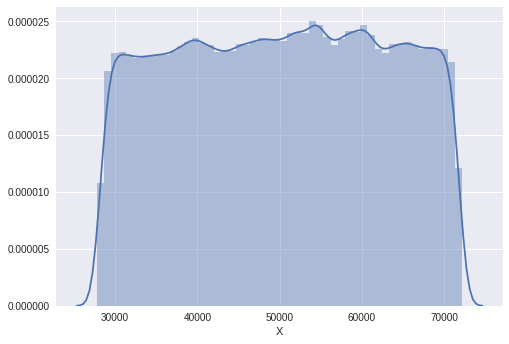

In [6]:
sns.distplot(train.X)

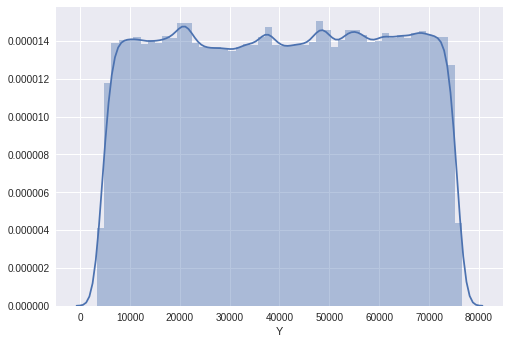

In [7]:
sns.distplot(train.Y)

In [8]:
pd.concat(train)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
sns.distplot(train.Z,bins=400)

In [48]:
pd.factorize(train.Z)[1]

Float64Index([32325.0, 21981.0, 16809.0, 60771.0, 37497.0, 15516.0, 55599.0,
               7758.0, 11637.0, 45255.0, 12930.0, 31032.0, 24567.0, 27153.0,
              67236.0, 50427.0,  9051.0, 19395.0, 40083.0, 41376.0, 62064.0,
              42669.0, 46548.0, 63357.0, 72408.0, 34911.0, 14223.0, 43962.0,
               5172.0, 68529.0, 64650.0, 53013.0, 38790.0, 23274.0, 51720.0,
              49134.0, 20688.0, 25860.0,     0.0,  1293.0, 28446.0, 56892.0,
               3879.0, 29739.0, 54306.0, 65943.0, 33618.0, 58185.0, 10344.0,
               6465.0, 36204.0, 69822.0, 47841.0, 59478.0, 18102.0, 71115.0,
               2586.0],
             dtype='float64')

In [50]:
train.loc[train.Z==72408.0,:]

,index,event_id,X,Y,Z,TX,TY,chi2,signal
32,32,27354,36921.367188,21285.517578,72408.0,-0.924607,0.819380,0.849372,1.0
90,90,-999,52611.980469,41193.753906,72408.0,-0.090588,-0.600707,0.548812,0.0
112,112,-999,63449.601562,71578.187500,72408.0,-0.635268,0.109189,2.986484,0.0
162,162,-999,57272.250000,5019.402344,72408.0,0.040476,0.323921,0.960893,0.0
277,277,-999,29274.957031,18699.765625,72408.0,0.491090,0.024842,2.915200,0.0
318,318,-999,70854.171875,23399.433594,72408.0,0.457812,-0.349070,0.578794,0.0
386,386,-999,34454.835938,47101.843750,72408.0,-0.118843,0.502827,2.471957,0.0
430,430,-999,70865.109375,64797.125000,72408.0,0.325818,0.157626,2.111430,0.0
510,510,-999,45149.402344,66686.250000,72408.0,-0.001897,0.468973,0.812860,0.0
729,729,-999,66975.523438,76423.906250,72408.0,-0.097842,0.235379,1.918597,0.0


In [ ]:
db.

In [49]:
max(train.Z)

72408.0

In [17]:
train["Z"]=pd.factorize(train.Z)[0]

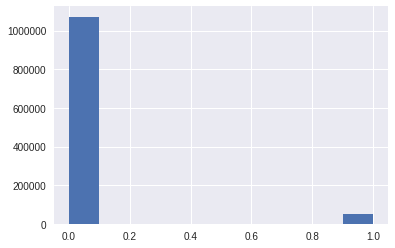

In [38]:
train.signal.hist()

In [18]:
train

,index,event_id,X,Y,Z,TX,TY,chi2,signal
0,0,-999,42720.238281,75152.406250,0,-0.475539,0.405506,2.652586,0.0
1,1,-999,46023.816406,37043.359375,1,0.330822,-0.013988,2.497527,0.0
2,2,-999,52706.117188,33872.730469,2,0.342634,-0.058724,2.120421,0.0
3,3,-999,47334.101562,9698.531250,3,0.007868,-0.632822,0.618535,0.0
4,4,-999,67380.835938,19137.265625,4,-0.212537,-0.192243,2.799303,0.0
5,5,-999,44266.722656,40664.953125,5,-0.629315,0.118676,2.002864,0.0
6,6,-999,68549.906250,66174.148438,6,0.264397,0.433780,2.448940,0.0
7,7,-999,55080.023438,7060.203125,7,-0.076749,0.442122,2.223178,0.0
8,8,-999,40029.910156,23022.150391,8,-0.381641,0.032440,1.795668,0.0
9,9,-999,67508.984375,55327.785156,9,-0.007403,0.056064,2.282499,0.0


In [4]:
train.shape

(1123177, 9)

In [9]:
%%time
est=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
print(model_selection.cross_val_score(est,X,y,cv=3,scoring="roc_auc").mean())

0.929318785114
CPU times: user 3min 11s, sys: 796 ms, total: 3min 12s
Wall time: 1min 2s


In [10]:
%%time
est=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
print(model_selection.cross_val_score(est,X,y,cv=3,scoring="roc_auc").mean())

0.937585908426
CPU times: user 3min 56s, sys: 516 ms, total: 3min 57s
Wall time: 1min 14s


In [17]:
%%time
est=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
print(model_selection.cross_val_score(est,X,y,cv=3,scoring="roc_auc").mean())

0.93969898213
CPU times: user 4min 6s, sys: 656 ms, total: 4min 6s
Wall time: 1min 21s


In [27]:
%%time
est=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
print(model_selection.cross_val_score(est,X,y,cv=3,scoring="roc_auc").mean())

0.938706797175
CPU times: user 5min 52s, sys: 844 ms, total: 5min 53s
Wall time: 1min 50s


In [32]:
%%time
res=[]
for i in X.columns:
    a=model_selection.cross_val_score(est,X.drop(i,axis=1),y,cv=3,scoring="roc_auc").mean()
    print(a,i)
    res.append((a,i))

0.932602972613 X
0.931361591422 Y
0.914780729113 Z
0.937708194945 TX
0.936041322427 TY
0.909661558668 chi2
0.939528243352 cat_Z
0.939698444884 X_sred
0.939565986499 Y_sred
0.939952539617 X_log
0.939780653041 Y_log
0.937620199671 diag
0.939093843973 cos
0.939138736125 sin
0.939712797906 tan
0.9388148466 TXY
CPU times: user 1h 13min 8s, sys: 11.9 s, total: 1h 13min 20s
Wall time: 22min 36s


In [34]:
X.columns

Index(['X', 'Y', 'Z', 'TX', 'TY', 'chi2', 'cat_Z', 'X_sred', 'Y_sred', 'X_log',
       'Y_log', 'diag', 'cos', 'sin', 'tan', 'TXY'],
      dtype='object')

In [35]:
tuning=['cat_Z', 'X_sred', 'Y_sred', 'X_log','Y_log', 'diag', 'cos', 'sin', 'tan', 'TXY']

X_log
tan
diag
sin
TXY
Y_log
Y_sred
X_sred
cos
cat_Z


In [39]:
set(tuning)-set("cos")

{'TXY',
 'X_log',
 'X_sred',
 'Y_log',
 'Y_sred',
 'cat_Z',
 'cos',
 'diag',
 'sin',
 'tan'}

In [46]:
maxi=0
base=0
while True:
    for i in set(tuning):
        an=model_selection.cross_val_score(est,X.drop(i,axis=1),y,cv=3,scoring="roc_auc").mean()
        print("-",end="")
        if an>maxi:
            maxi=an
            trash=i
    print()
    if base>maxi:
        break
    base=maxi
    X.drop(trash,axis=1,inplace=True)
    tuning=set(tuning)-set(trash)
    print(base,trash)

--

KeyboardInterrupt: 

In [11]:
    params = {
        'eta': 0.02,
        'silent': 1,
        'eval_metric': 'auc',
        'verbose_eval': True
    }

In [12]:
xdata=xgboost.DMatrix(X,label=y)

In [13]:
%%time
ad=xgboost.cv(params,xdata,num_boost_round=10000,early_stopping_rounds=5,nfold=3)

CPU times: user 3h 41s, sys: 12.2 s, total: 3h 53s
Wall time: 55min 24s


In [21]:
len(ad["test-auc-mean"])

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.906112,0.001102,0.907733,0.000449
1,0.911205,0.002444,0.912723,0.001269
2,0.916014,0.003369,0.917416,0.002359
3,0.921728,0.001200,0.923032,0.001225
4,0.923261,0.001109,0.924577,0.001952
5,0.925321,0.001485,0.926585,0.000158
6,0.926197,0.001678,0.927569,0.000305
7,0.926816,0.001651,0.928094,0.000417
8,0.927605,0.001546,0.928959,0.000164
9,0.935697,0.003318,0.936765,0.004665


In [14]:
%%time
bs=xgboost.train(params,xdata,num_boost_round=len(ad["test-auc-mean"]))

CPU times: user 1h 28min 30s, sys: 5.25 s, total: 1h 28min 35s
Wall time: 24min 59s


In [18]:
y_pred=bs.predict(xgboost.DMatrix(test.drop("index",axis=1)))

In [17]:
test.head()

,index,X,Y,Z,TX,TY,chi2,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,0,37259.390625,62516.367188,63357.0,-0.475465,-0.250186,1.405402,12865.520828,22337.911657,9.462384,10.014085,25777.973608,0.499090,0.866550,0.575950,0.118955
1,1,41426.312500,57520.265625,25860.0,-0.213876,0.155208,2.541856,8698.598953,17341.810094,9.071032,9.760933,19401.134015,0.448355,0.893855,0.501597,-0.033195
2,2,40752.921875,54653.265625,46548.0,0.044215,-0.333426,2.389629,9371.989578,14474.810094,9.145587,9.580234,17243.964623,0.543494,0.839413,0.647469,-0.014742
3,3,29293.980469,23582.425781,14223.0,-0.265671,-0.137444,2.402328,20830.930984,16596.029750,9.944242,9.716979,26633.735921,0.782126,0.623121,1.255176,0.036515
4,4,49538.128906,63314.617188,31032.0,-0.063467,-0.550298,1.223460,586.782547,23136.161657,6.376357,10.049195,23143.601491,0.025354,0.999679,0.025362,0.034926


In [16]:
X.head()

,X,Y,Z,TX,TY,chi2,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,42720.238281,75152.406250,32325.0,-0.475539,0.405506,2.652586,7470.004038,34964.031668,8.918785,10.462104,35753.104352,0.208933,0.977930,0.213648,-0.192834
1,46023.816406,37043.359375,21981.0,0.330822,-0.013988,2.497527,4166.425913,3145.015207,8.335054,8.053892,5220.174858,0.798139,0.602473,1.324771,-0.004628
2,52706.117188,33872.730469,16809.0,0.342634,-0.058724,2.120421,2515.874868,6315.644114,7.830773,8.750943,6798.307651,0.370074,0.929002,0.398356,-0.020121
3,47334.101562,9698.531250,60771.0,0.007868,-0.632822,0.618535,2856.140757,30489.843332,7.957577,10.325182,30623.325856,0.093267,0.995641,0.093675,-0.004979
4,67380.835938,19137.265625,37497.0,-0.212537,-0.192243,2.799303,17190.593618,21051.108957,9.752176,9.954756,27178.404980,0.632509,0.774553,0.816612,0.040859


In [9]:
ldata=lightgbm.Dataset(X,y)

In [10]:
param = {'num_leaves':31, 'num_trees':100, 'objective':'binary',"learning_rate":0.05}
param['metric'] = 'auc'

In [30]:
%%time
an=lightgbm.cv(param,ldata,num_boost_round=10000,early_stopping_rounds=10,nfold=3)

CPU times: user 34min 55s, sys: 6.3 s, total: 35min 1s
Wall time: 11min 10s


In [23]:
len(an["auc-mean"])

140

In [34]:
len(an["auc-mean"])

1639

In [11]:
test.drop("index",axis=1,inplace=True)

In [12]:
X.head()

,X,Y,Z,TX,TY,chi2,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,42720.238281,75152.406250,32325.0,-0.475539,0.405506,2.652586,7470.004038,34964.031668,8.918785,10.462104,35753.104352,0.208933,0.977930,0.213648,-0.192834
1,46023.816406,37043.359375,21981.0,0.330822,-0.013988,2.497527,4166.425913,3145.015207,8.335054,8.053892,5220.174858,0.798139,0.602473,1.324771,-0.004628
2,52706.117188,33872.730469,16809.0,0.342634,-0.058724,2.120421,2515.874868,6315.644114,7.830773,8.750943,6798.307651,0.370074,0.929002,0.398356,-0.020121
3,47334.101562,9698.531250,60771.0,0.007868,-0.632822,0.618535,2856.140757,30489.843332,7.957577,10.325182,30623.325856,0.093267,0.995641,0.093675,-0.004979
4,67380.835938,19137.265625,37497.0,-0.212537,-0.192243,2.799303,17190.593618,21051.108957,9.752176,9.954756,27178.404980,0.632509,0.774553,0.816612,0.040859


In [13]:
test.head()

,X,Y,Z,TX,TY,chi2,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,37259.390625,62516.367188,63357.0,-0.475465,-0.250186,1.405402,12865.520828,22337.911657,9.462384,10.014085,25777.973608,0.499090,0.866550,0.575950,0.118955
1,41426.312500,57520.265625,25860.0,-0.213876,0.155208,2.541856,8698.598953,17341.810094,9.071032,9.760933,19401.134015,0.448355,0.893855,0.501597,-0.033195
2,40752.921875,54653.265625,46548.0,0.044215,-0.333426,2.389629,9371.989578,14474.810094,9.145587,9.580234,17243.964623,0.543494,0.839413,0.647469,-0.014742
3,29293.980469,23582.425781,14223.0,-0.265671,-0.137444,2.402328,20830.930984,16596.029750,9.944242,9.716979,26633.735921,0.782126,0.623121,1.255176,0.036515
4,49538.128906,63314.617188,31032.0,-0.063467,-0.550298,1.223460,586.782547,23136.161657,6.376357,10.049195,23143.601491,0.025354,0.999679,0.025362,0.034926


In [14]:
%%time
num_round = 1639
bst = lightgbm.train(param, ldata, num_round)

CPU times: user 10min 53s, sys: 2.45 s, total: 10min 55s
Wall time: 3min 9s


In [16]:
%%time
ypred = bst.predict(test)

CPU times: user 7min 58s, sys: 1.78 s, total: 8min
Wall time: 2min 32s


In [20]:
ans=pd.DataFrame(y_pred)

In [30]:
ans.columns

Index([0, 'Id', 'Prediction'], dtype='object')

0          2.034378e-02
1          2.345949e-03
2          5.235601e-03
3          1.236387e-07
4          6.835980e-03
5          1.395041e-03
6          1.332753e-04
7          1.331879e-07
8          6.058045e-04
9          1.453968e-02
10         8.933312e-06
11         3.061151e-03
12         1.185595e-04
13         3.984523e-07
14         1.071957e-02
15         1.584154e-05
16         5.528139e-05
17         1.771952e-02
18         1.042358e-02
19         1.664530e-07
20         1.220040e-03
21         1.484780e-05
22         6.266622e-07
23         1.138502e-03
24         3.999653e-03
25         3.781104e-03
26         9.286545e-07
27         1.182223e-06
28         3.605063e-03
29         1.042960e-04
               ...     
1126069    3.777737e-02
1126070    2.219177e-04
1126071    2.206289e-05
1126072    3.681039e-04
1126073    2.577265e-04
1126074    6.683612e-03
1126075    5.009837e-06
1126076    2.026148e-02
1126077    1.763011e-07
1126078    1.546624e-02
1126079    1.535

In [21]:
ans["Id"]=test.index
ans["Prediction"]=ans.loc[:,0]

In [22]:
sub=ans.iloc[:,1:]

In [24]:
sub.head()

,Id,Prediction
0,0,0.043587
1,1,0.003395
2,2,0.009914
3,3,-0.003688
4,4,0.017174


In [25]:
sub.to_csv("./sub",index=None)

In [41]:
sub.shape

(1126099, 2)

In [35]:
ans.drop("O",axis=1)

ValueError: labels ['O'] not contained in axis

In [42]:
ypred

array([  5.78138114e-04,   4.39265672e-04,   1.38266043e-03, ...,
         4.27263124e-03,   2.30238670e-01,   1.15847350e-05])

In [ ]:
np.savetxt("./ans",ypred)

In [40]:
test.drop()

,index,X,Y,Z,TX,TY,chi2,X_sred,Y_sred,X_log,Y_log,diag,cos,sin,tan,TXY
0,0,37259.390625,62516.367188,63357.0,-0.475465,-0.250186,1.405402,12865.520828,22337.911657,9.462384,10.014085,25777.973608,0.499090,0.866550,0.575950,0.118955
1,1,41426.312500,57520.265625,25860.0,-0.213876,0.155208,2.541856,8698.598953,17341.810094,9.071032,9.760933,19401.134015,0.448355,0.893855,0.501597,-0.033195
2,2,40752.921875,54653.265625,46548.0,0.044215,-0.333426,2.389629,9371.989578,14474.810094,9.145587,9.580234,17243.964623,0.543494,0.839413,0.647469,-0.014742
3,3,29293.980469,23582.425781,14223.0,-0.265671,-0.137444,2.402328,20830.930984,16596.029750,9.944242,9.716979,26633.735921,0.782126,0.623121,1.255176,0.036515
4,4,49538.128906,63314.617188,31032.0,-0.063467,-0.550298,1.223460,586.782547,23136.161657,6.376357,10.049195,23143.601491,0.025354,0.999679,0.025362,0.034926
5,5,60379.285156,46759.359375,49134.0,0.505208,0.198326,2.903332,10254.373703,6580.903844,9.235557,8.792079,12184.435787,0.841596,0.540107,1.558201,0.100196
6,6,34121.246094,53213.039062,64650.0,-0.413783,0.036217,2.916555,16003.665359,13034.583532,9.680636,9.475438,20640.195560,0.775364,0.631515,1.227785,-0.014986
7,7,31708.781250,66102.234375,6465.0,-0.052883,0.208817,2.823098,18416.130203,25923.778844,9.821036,10.162955,31799.310703,0.579136,0.815231,0.710395,-0.011043
8,8,38118.882812,51800.570312,14223.0,0.146801,-0.046224,1.988011,12006.028640,11622.114782,9.393247,9.360751,16709.825724,0.718501,0.695526,1.033033,-0.006786
9,9,53618.378906,67094.710938,50427.0,-0.286310,0.127865,2.808653,3493.467453,26916.255407,8.158936,10.200523,27142.017610,0.128711,0.991682,0.129790,-0.036609
